In [47]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [48]:
# Cargamos el dataframe
df = pd.read_csv('Escritorio/Tp1-OrgaDatos/data/train.csv', index_col='id', parse_dates=['fecha'])
df.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio                               float64
dtype: obj

Dado que sabemos que las columnas: latitud, longitud tienen principalmente valores nulos, decidimos eliminar estas. 

In [66]:
df.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,2015-08-23,False,False,False,False,False,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,2013-06-28,False,False,False,True,True,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,2015-10-17,False,False,False,False,False,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,2012-03-09,False,False,False,True,True,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,2016-06-07,False,False,False,False,False,1150000.00


In [49]:
#Eliminamos columnas latitud y longitud
df = df.drop(['lat'],axis=1)
df= df.drop(['lng'],axis=1)
df.describe()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,196445.00,217529.00,202235.00,213779.00,222600.00,188533.00,211379.00,240000.00,240000.00,240000.00,240000.00,240000.00,240000.00
mean,8.12,2.90,1.55,2.13,174.02,176.77,2423467.82,0.06,0.06,0.09,0.44,0.40,2530838.35
std,9.55,0.90,0.85,0.91,98.15,94.43,10567938.36,0.24,0.23,0.28,0.50,0.49,2152551.80
min,0.00,1.00,0.00,1.00,15.00,15.00,22.00,0.00,0.00,0.00,0.00,0.00,310000.00
25%,0.00,2.00,1.00,1.00,90.00,102.00,24890.00,0.00,0.00,0.00,0.00,0.00,952772.50
50%,5.00,3.00,2.00,2.00,153.00,155.00,56383.00,0.00,0.00,0.00,0.00,0.00,1850000.00
75%,10.00,3.00,2.00,3.00,240.00,238.00,87838.00,0.00,0.00,0.00,1.00,1.00,3390000.00
max,80.00,10.00,3.00,4.00,439.00,439.00,50003999.00,1.00,1.00,1.00,1.00,1.00,12525000.00


In [57]:
# Cambiamos el tipo de dato de las columnas: piscina, gimnasio, usosmultiples,escuelascercanas y
# centroscomercialescercanos

df['gimnasio'] = df['gimnasio'].astype('bool')
df['piscina'] = df['piscina'].astype('bool')
df['usosmultiples'] = df['usosmultiples'].astype('bool')
df['escuelascercanas'] = df['escuelascercanas'].astype('bool')
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype('bool')
print(df.memory_usage(deep=False))
df.dtypes



Index                         1920000
titulo                        1920000
descripcion                   1920000
tipodepropiedad               1920000
direccion                     1920000
ciudad                        1920000
provincia                     1920000
antiguedad                    1920000
habitaciones                  1920000
garages                       1920000
banos                         1920000
metroscubiertos               1920000
metrostotales                 1920000
idzona                        1920000
fecha                         1920000
gimnasio                       240000
usosmultiples                  240000
piscina                        240000
escuelascercanas               240000
centroscomercialescercanos     240000
precio                        1920000
dtype: int64


titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio                               float64
dtype: object

In [90]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
precio,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
centroscomercialescercanos,0,0.00
fecha,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06
ciudad,372,0.16


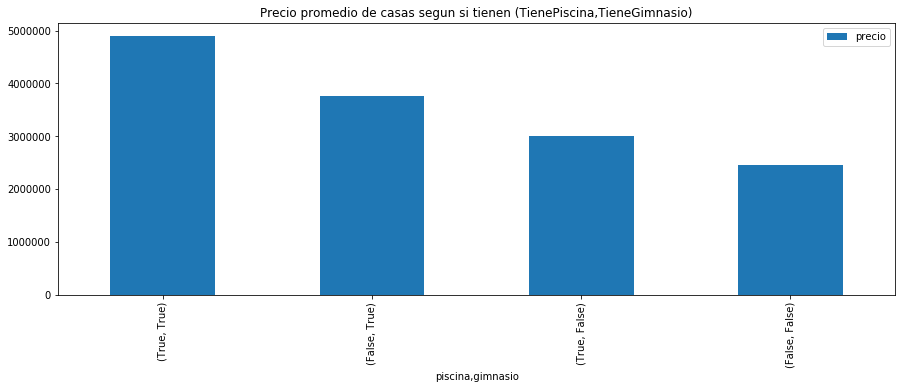

In [160]:

df.loc[df['tipodepropiedad'] == 'Apartamento'].groupby(['piscina','gimnasio']).agg({'precio':'mean'})\
    .sort_values('precio',ascending= False)\
        .plot(kind='bar',figsize=(15,5),title= 'Precio promedio de casas segun si tienen (TienePiscina,TieneGimnasio)');

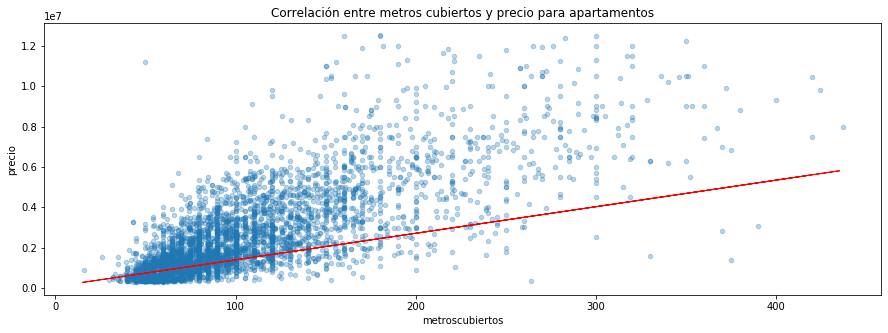

In [158]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df1 = df.loc[df['tipodepropiedad'] == 'Apartamento']
df1_sample = df1.sample(frac=0.2).copy().dropna().sort_values(column)
df1_sample.sort_values(column).plot.scatter(x=column, y='precio',alpha=.3,figsize=(15, 5), title="Correlación entre metros cubiertos y precio para apartamentos")
plt.ticklabel_format(style = '')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);

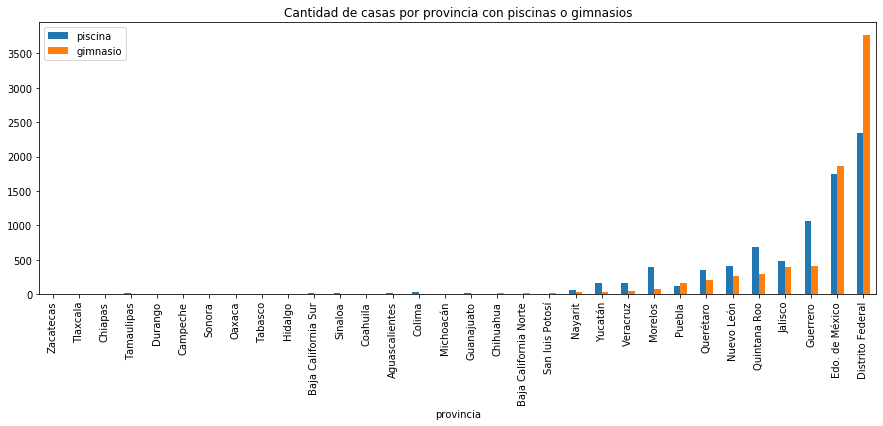

In [184]:
casas = df.loc[df['tipodepropiedad'] == 'Apartamento']
casas.groupby('provincia').agg({'piscina': 'sum','gimnasio' : 'sum'})\
        .sort_values('gimnasio')\
             .plot(kind='bar',figsize=(15,5),title= 'Cantidad de casas por provincia con piscinas o gimnasios');

False    30075
True      3764
Name: gimnasio, dtype: int64


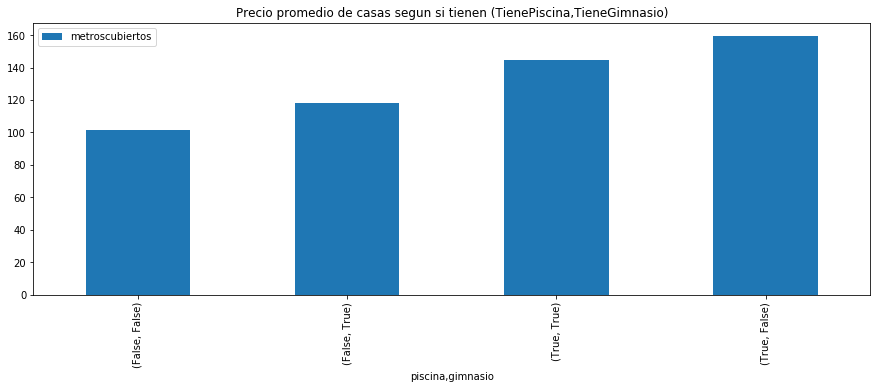

In [192]:
casas_de_morelos = casas.loc[casas['provincia']== 'Distrito Federal']
print(casas_de_morelos['gimnasio'].value_counts())
casas_de_morelos.groupby(['piscina','gimnasio']).agg({'metroscubiertos':'mean'})\
    .sort_values('metroscubiertos')\
         .plot(kind='bar',figsize=(15,5),title= 'Precio promedio de casas segun si tienen (TienePiscina,TieneGimnasio)');